# CNN Text Classification

---
## Data Check

- NSMC 데이터
    - Naver sentiment movie corpus v1.0
    - 네이버 영화 댓글 감정분석 데이터셋
    - 이진 분류
- https://github.com/e9t/nsmc

In [1]:
import pandas as pd

df = pd.read_csv('data/ratings_train.txt', sep='\t')
df.head(2)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1


In [2]:
df['label'].value_counts()

label
0    75173
1    74827
Name: count, dtype: int64

In [3]:
df.isna().sum()

id          0
document    5
label       0
dtype: int64

In [4]:
df = df.dropna(how='any', axis=0)
df.shape

(149995, 3)

---
## Tokenization

In [5]:
vocab = set()
for doc in df['document']:
    for token in doc.split():
        vocab.add(token)

In [6]:
len(vocab)

357862

In [7]:
vocab_cnt_dict = {}
for doc in df['document']:
    for token in doc.split():
        if token not in vocab_cnt_dict:
            vocab_cnt_dict[token] = 0
        vocab_cnt_dict[token] += 1

In [8]:
vocab_cnt_list = [(token, cnt) for token, cnt in vocab_cnt_dict.items()]

In [9]:
vocab_cnt_list[:10]

[('아', 1204),
 ('더빙..', 2),
 ('진짜', 5929),
 ('짜증나네요', 10),
 ('목소리', 99),
 ('흠...포스터보고', 1),
 ('초딩영화줄....오버연기조차', 1),
 ('가볍지', 17),
 ('않구나', 2),
 ('너무재밓었다그래서보는것을추천한다', 1)]

In [10]:
top_vocabs = sorted(vocab_cnt_list, key= lambda tup: tup[1], reverse=True)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
cnts = [cnt for _, cnt in top_vocabs]

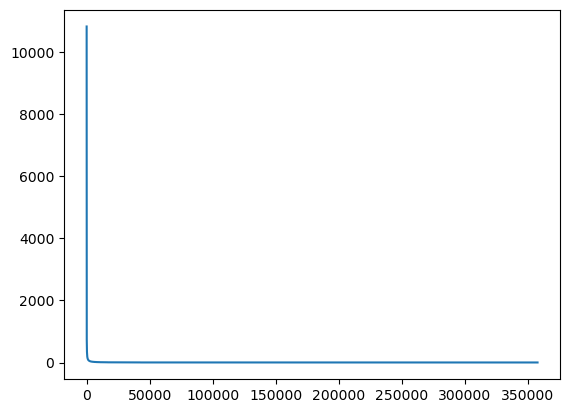

In [13]:
plt.plot(range(len(cnts)), cnts)

In [14]:
np.mean(cnts)

3.1792590439890236

In [15]:
cnts[:10]

[10825, 8239, 7791, 5929, 5059, 3598, 3285, 3260, 3249, 3237]

In [16]:
sum(np.array(cnts)>=3)

42635

In [17]:
n_vocab = sum(np.array(cnts)>=3)
top_vocabs = top_vocabs[:n_vocab]

In [18]:
vocabs = [token for token, _ in top_vocabs]
vocabs[:5]

['영화', '너무', '정말', '진짜', '이']